### <font color='red'> Project 3 : Buzz Prediction on Twitter

Project Description:
- Use same datasets as Project 2.
- Run all the models only on 10% data. Use code given in Project 2 for sampling.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply four voting classifiers - two with hard voting and two with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 2 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 2, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project3_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project3_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project3_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
from sklearn import preprocessing
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import scipy.stats as ss
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix


In [130]:
##Packages For Regression Models
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [106]:
## Packages for Ensemble Regression Models
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from  sklearn.ensemble import GradientBoostingRegressor
import sklearn.decomposition as skde
from sklearn.decomposition import PCA

In [2]:
df=pd.read_csv('Twitter.data', header=None)

In [4]:
df.columns=['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6','Annotation']

In [5]:
X1=df[['Number of Created Discussions 0'
,'Number of Created Discussions 1',
'Number of Created Discussions 2',
'Number of Created Discussions 3',
'Number of Created Discussions 4',
'Number of Created Discussions 5',
'Number of Created Discussions 6',
'Author Increase 0',
'Author Increase 1',
'Author Increase 2',
'Author Increase 3',
'Author Increase 4',
'Author Increase 5',
'Author Increase 6',
'Attention Level 0',
'Attention Level 1',
'Attention Level 2',
'Attention Level 3',
'Attention Level 4',
'Attention Level 5',
'Attention Level 6',
'Burstiness Level 0',
'Burstiness Level 1',
'Burstiness Level 2',
'Burstiness Level 3',
'Burstiness Level 4',
'Burstiness Level 5',
'Burstiness Level 6',
'Number of Atomic Containers 0',
'Number of Atomic Containers 1',
'Number of Atomic Containers 2',
'Number of Atomic Containers 3',
'Number of Atomic Containers 4',
'Number of Atomic Containers 5',
'Number of Atomic Containers 6',
'Number of Contributions 0',
'Number of Contributions 1',
'Number of Contributions 2',
'Number of Contributions 3',
'Number of Contributions 4',
'Number of Contributions 5',
'Number of Contributions 6',
'Contribution Sparseness 0',
'Contribution Sparseness 1',
'Contribution Sparseness 2',
'Contribution Sparseness 3',
'Contribution Sparseness 4',
'Contribution Sparseness 5',
'Contribution Sparseness 6',
'Author Interaction 0',
'Author Interaction 1',
'Author Interaction 2',
'Author Interaction 3',
'Author Interaction 4',
'Author Interaction 5',
'Author Interaction 6',
'Number of Authors 0',
'Number of Authors 1',
'Number of Authors 2',
'Number of Authors 3',
'Number of Authors 4',
'Number of Authors 5',
'Number of Authors 6',
'Average Discussions Length 0',
'Average Discussions Length 1',
'Average Discussions Length 2',
'Average Discussions Length 3',
'Average Discussions Length 4',
'Average Discussions Length 5',
'Average Discussions Length 6',
'Number of Discussions 0',
'Number of Discussions 1',
'Number of Discussions 2',
'Number of Discussions 3',
'Number of Discussions 4',
'Number of Discussions 5',
'Number of Discussions 6']]
y1=df['Annotation']

In [159]:
from sklearn.model_selection import train_test_split
_, sample_data, _, sample_target = train_test_split(X1, y1, shuffle = True, test_size = 0.1)

In [160]:
X=sample_data
y=sample_target

In [161]:
scaler = MinMaxScaler()

In [185]:
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=18)
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

In [163]:
Labels=np.array(y_train)
Features=np.array(X_train)

# Bagging and Pasting

In [164]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
bag_rgs1 = BaggingRegressor(lin_mod, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=18)
bag_rgs1.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = bag_rgs1.predict(X_test) 
print_metrics(y_test, y_score, 77)  

Mean Square Error      = 31519.413162899637
Root Mean Square Error = 177.5370754600279
Mean Absolute Error    = 64.00464181186028
Median Absolute Error  = 12.889175055399974
R^2                    = 0.919507127131507
Adjusted R^2           = 0.9190853788834542


In [165]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ridge = Ridge(alpha = 0.00001)
bag_rgs2 = BaggingRegressor(ridge, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=18)
bag_rgs2.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = bag_rgs2.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 19850.705913561716
Root Mean Square Error = 140.89253320727013
Mean Absolute Error    = 45.91276188335645
Median Absolute Error  = 8.997941337521024
R^2                    = 0.9493061517613872
Adjusted R^2           = 0.9490405376651353


In [166]:
lasso = Lasso(alpha=0.005)
pst_rgs1 = BaggingRegressor(lasso, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=18)
pst_rgs1.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = pst_rgs1.predict(X_test) 
print_metrics(y_test, y_score, 77)  

Mean Square Error      = 20440.73730889909
Root Mean Square Error = 142.97110655268457
Mean Absolute Error    = 45.444148256888184
Median Absolute Error  = 7.4595273994724325
R^2                    = 0.9477993558750599
Adjusted R^2           = 0.9475258468124267


In [167]:
knn_reg = LinearSVR(random_state=0, tol=0.005, C=1000, epsilon=0.01)
pst_rgs2 = BaggingRegressor(knn_reg, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=18)
pst_rgs2.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = pst_rgs2.predict(X_test) 
print_metrics(y_test, y_score, 77)

Mean Square Error      = 17635.623616047946
Root Mean Square Error = 132.79918529888633
Mean Absolute Error    = 43.18506618347046
Median Absolute Error  = 6.464953553147199
R^2                    = 0.9549629302313904
Adjusted R^2           = 0.9547269552363946


In [168]:
rnd_clf = RandomForestRegressor(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=18)
rnd_clf.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = rnd_clf.predict(X_test) 
print_metrics(y_test, y_score, 77)

Mean Square Error      = 23192.78791185523
Root Mean Square Error = 152.29178543787327
Mean Absolute Error    = 54.31992898961505
Median Absolute Error  = 15.88890831436305
R^2                    = 0.940771291673276
Adjusted R^2           = 0.9404609585582928


# Adaboost Model

In [67]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"learning_rate": [0.1, 1, 10]}
## Define the AdaBoosted tree model
nr.seed(3456)
ab_clf = AdaBoostRegressor(Ridge(alpha = 0.00001), n_estimators=200, random_state=18)

## Perform the grid search over the parameters
nr.seed(4455)
ab_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid, 
                      cv = 5, # Use the inside folds
                      scoring = 'r2',
                      return_train_score = True)
ab_clf.fit(Features, Labels)
print(ab_clf.best_estimator_.learning_rate)

0.1


In [76]:
ab_clf = AdaBoostRegressor(Ridge(alpha = 0.00001), n_estimators=200, random_state=18, learning_rate=.1)
cv_estimate = ms.cross_val_score(ab_clf, Features, Labels, 
                                 cv = 5) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.917
SDT of the metric       = 0.051
Outcomes by cv fold
Fold  1    0.938
Fold  2    0.821
Fold  3    0.916
Fold  4    0.969
Fold  5    0.942


In [169]:
ab1_clf = AdaBoostRegressor(Ridge(alpha = 0.00001), n_estimators=200, random_state=18, learning_rate=.1)
ab1_clf.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = ab1_clf.predict(X_test) 
print_metrics(y_test, y_score, 77)

Mean Square Error      = 38107.642212821345
Root Mean Square Error = 195.21178809903193
Mean Absolute Error    = 91.42511879360723
Median Absolute Error  = 44.18457553828354
R^2                    = 0.9026824013473332
Adjusted R^2           = 0.9021724987277122


In [88]:
## Define the dictionary for the grid search and the model object to search on
param_grid = {"learning_rate": [0.1, 1, 10]}
## Define the AdaBoosted tree model
nr.seed(3456)
ab2_clf = AdaBoostRegressor(linear_model.LinearRegression(fit_intercept = False), n_estimators=200, random_state=18)

## Perform the grid search over the parameters
nr.seed(4455)
ab2_clf = ms.GridSearchCV(estimator = ab_clf, param_grid = param_grid, 
                      cv = 5, # Use the inside folds
                      scoring = 'r2',
                      return_train_score = True)
ab2_clf.fit(Features, Labels)
print(ab2_clf.best_estimator_.learning_rate)

0.1


In [80]:
ab2_clf = AdaBoostRegressor(linear_model.LinearRegression(fit_intercept = False), n_estimators=200, random_state=18, learning_rate=.1)
cv_estimate = ms.cross_val_score(ab2_clf, Features, Labels, 
                                 cv = 5) # Use the outside folds

print('Mean performance metric = %4.3f' % np.mean(cv_estimate))
print('SDT of the metric       = %4.3f' % np.std(cv_estimate))
print('Outcomes by cv fold')
for i, x in enumerate(cv_estimate):
    print('Fold %2d    %4.3f' % (i+1, x))

Mean performance metric = 0.911
SDT of the metric       = 0.062
Outcomes by cv fold
Fold  1    0.943
Fold  2    0.787
Fold  3    0.930
Fold  4    0.953
Fold  5    0.942


In [170]:
ab2_clf = AdaBoostRegressor(linear_model.LinearRegression(fit_intercept = False), n_estimators=200, random_state=18, learning_rate=.1)
ab2_clf.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = ab2_clf.predict(X_test) 
print_metrics(y_test, y_score, 77)

Mean Square Error      = 37133.857963275
Root Mean Square Error = 192.70147369253561
Mean Absolute Error    = 88.70679267505237
Median Absolute Error  = 40.846882421389424
R^2                    = 0.9051692081731766
Adjusted R^2           = 0.9046723353583652


# GradientBoosting

In [89]:
nr.seed(3456)
## Define the dictionary for the grid search and the model object to search on
gbrt = GradientBoostingRegressor(random_state=18,n_estimators=200)
gbrt.fit(X_train, y_train)
param_grid  = {"max_depth": [3,5,4,6], "learning_rate":[0.1,0.5,1,1.5]}
## Define the SVM model
gradboost_clf = GradientBoostingRegressor(random_state=2)

## Perform the grid search over the parameters
scoring= 'r2'
clf = ms.GridSearchCV(estimator = gradboost_clf, param_grid = param_grid, 
                      cv = 5, # Use the inside folds
                      scoring = scoring,
                      return_train_score = True)
clf.fit(Features, Labels)
#best c and epsilon parameters
print(clf.best_estimator_.max_depth)
print(clf.best_estimator_.learning_rate)

3
0.1


In [171]:
gbrt = GradientBoostingRegressor(max_depth=3, n_estimators=20, learning_rate=0.1, random_state=18)
gbrt.fit(X, y)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = gbrt_slow.predict(X_test) 
print_metrics(y_test, y_score, 77)

Mean Square Error      = 378466.30740159075
Root Mean Square Error = 615.1961535978511
Mean Absolute Error    = 186.02756702218244
Median Absolute Error  = 69.12273305239322
R^2                    = 0.03348960815862689
Adjusted R^2           = 0.0284255068294339


In [172]:
gbrt = GradientBoostingRegressor(random_state=18, learning_rate=0.1,  max_depth=3, n_estimators=20)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.938
Accuracy on test set: 0.937


# PCA Dimention Reduction

In [182]:
pca_mod = PCA()
pca_comps = pca_mod.fit(X_train)
pca_comps

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [108]:
print(pca_comps.explained_variance_ratio_)
print(np.sum(pca_comps.explained_variance_ratio_))

[3.52606746e-01 1.48507602e-01 9.80690374e-02 9.00516533e-02
 8.29756065e-02 8.00114747e-02 6.64927461e-02 4.85293555e-02
 4.57920152e-03 3.78365816e-03 3.49288525e-03 2.60353056e-03
 2.38474304e-03 1.58732182e-03 1.50535281e-03 1.38347089e-03
 1.18383345e-03 9.66263651e-04 9.01434315e-04 9.00939848e-04
 8.60175970e-04 7.25478229e-04 5.95117270e-04 5.89807003e-04
 5.69071441e-04 5.36950226e-04 4.70029614e-04 4.47557067e-04
 3.63536114e-04 3.14877474e-04 2.83226510e-04 2.45412514e-04
 2.40676418e-04 2.02262377e-04 1.58159265e-04 1.45258046e-04
 1.37459589e-04 9.42325646e-05 8.11034411e-05 6.17877695e-05
 5.97153704e-05 5.31806844e-05 3.96012104e-05 3.12630056e-05
 2.72268597e-05 2.23472683e-05 1.74123338e-05 1.71174011e-05
 1.42992508e-05 1.37485593e-05 1.01368673e-05 9.30184962e-06
 6.69433459e-06 6.42118804e-06 5.57928741e-06 4.71251002e-06
 4.29466138e-06 3.90437646e-06 3.40240712e-06 3.17674030e-06
 1.86491792e-06 1.09915600e-06 1.02033270e-06 8.39330782e-07
 7.88942305e-07 7.659836

<IPython.core.display.Javascript object>


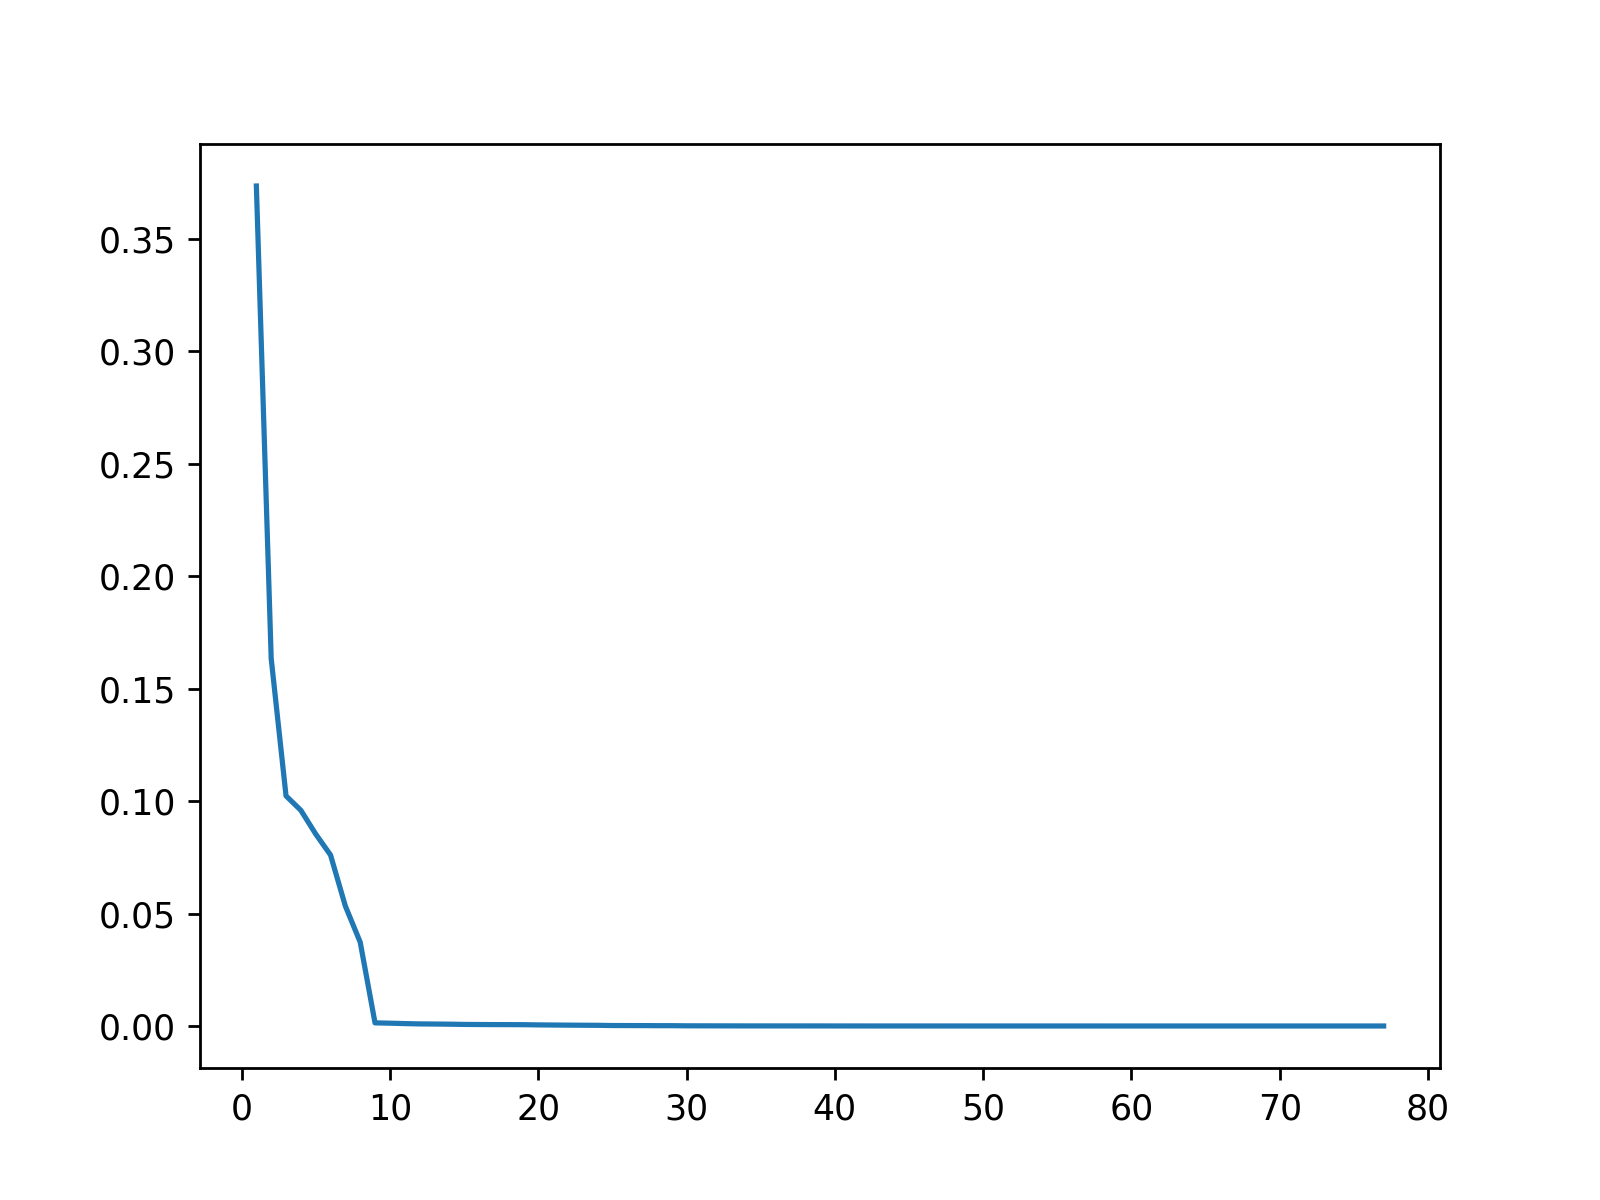

In [174]:
def plot_explained(mod):
    comps = mod.explained_variance_ratio_
    x = range(len(comps))
    x = [y + 1 for y in x]          
    plt.plot(x,comps)

plot_explained(pca_comps)

# Running and Evaluating Models with PCA Dimention Reduction

In [270]:
pca_mod_10 = PCA(n_components = 10)
pca_mod_10.fit(X_train)
Comps_train = pca_mod_10.transform(X_train)
X_train=Comps_train
X_train.shape

(43743, 10)

In [271]:
pca_mod_10.fit(X_test)
Comps_test = pca_mod_10.transform(X_test)
X_test=Comps_test
X_test.shape

(14582, 10)

In [272]:
knn_regp = KNeighborsRegressor(3) 
knn_regp.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = knn_regp.predict(X_test) 
print_metrics(y_test, y_score, 10)    

Mean Square Error      = 73822.06304766913
Root Mean Square Error = 271.702158709991
Mean Absolute Error    = 77.80058748228409
Median Absolute Error  = 22.5
R^2                    = 0.811476504810686
Adjusted R^2           = 0.8113600683944971


In [273]:
y_knr_predict = knn_regp.predict(X_test)
y_knr_train_predict = knn_regp.predict(X_train)
report_table=0
report_table1 = [['knr', 'k = 3', knn_regp.score(X_train, y_train), knn_regp.score(X_test, y_test), sklm.r2_score(y_test,y_knr_predict)]]
report = pd.DataFrame(report_table1,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931166,0.811477,0.811477


In [274]:
lin_modp = linear_model.LinearRegression(fit_intercept = False)
lin_modp.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_modp.predict(X_test) 
print_metrics(y_test, y_score, 10)    

Mean Square Error      = 101727.79156754995
Root Mean Square Error = 318.9479449182107
Mean Absolute Error    = 226.75176785589377
Median Absolute Error  = 223.555949725794
R^2                    = 0.7402120987621184
Adjusted R^2           = 0.7400516478211946


In [275]:
y_lreg_predict = lin_modp.predict(X_test)
y_lreg_train_predict = lin_modp.predict(X_train)
report_table2 = report_table1 + [['Linear reg', '-', lin_modp.score(X_train, y_train), lin_modp.score(X_test, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_table2,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931166,0.811477,0.811477
1,Linear reg,-,0.751444,0.740212,0.740212


In [276]:
sgd_regp = SGDRegressor(random_state= 0, max_iter = 1000, learning_rate = 'optimal', penalty = 'l2')
sgd_regp.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = sgd_regp.predict(X_test) 
print_metrics(y_test, y_score, 10)    

Mean Square Error      = 63868.36149814364
Root Mean Square Error = 252.72190545764656
Mean Absolute Error    = 111.0623856739314
Median Absolute Error  = 42.667322728617464
R^2                    = 0.8368958243029645
Adjusted R^2           = 0.8367950874390286


In [277]:
y_sgdreg_predict = sgd_regp.predict(X_test)
y_sgdreg_train_predict = sgd_regp.predict(X_train)
report_table3 =report_table2 + [['SGD reg', 'max_iter=10000, penalty=L2', sgd_regp.score(X_train, y_train), sgd_regp.score(X_test, y_test), sklm.r2_score(y_test,y_sgdreg_predict)]]
report = pd.DataFrame(report_table3,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931166,0.811477,0.811477
1,Linear reg,-,0.751444,0.740212,0.740212
2,SGD reg,"max_iter=10000, penalty=L2",0.854928,0.836896,0.836896


In [281]:
lregp = LinearRegression()
lregp.fit(X_train, y_train)
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lregp.fit(X_train_poly, y_train)
    train_score_list.append(lregp.score(X_train_poly, y_train))
    test_score_list.append(lregp.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.854954632346474, 0.878291543264971]
[0.8353931550867878, -1.3374167297228965]


In [282]:
report_table4 =report_table3 + [['Polynomial', '-', lregp.score(X_train_poly, y_train), lregp.score(X_test_poly, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_table4,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931166,0.811477,0.811477
1,Linear reg,-,0.751444,0.740212,0.740212
2,SGD reg,"max_iter=10000, penalty=L2",0.854928,0.836896,0.836896
3,Polynomial,-,0.878292,-1.337417,0.740212


In [283]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ridgep = Ridge(alpha = 0.00001)
ridgep.fit(X_train,y_train) 

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = ridgep.predict(X_test) 
print_metrics(y_test, y_score, 10)    

Mean Square Error      = 64456.7755007683
Root Mean Square Error = 253.88338957239463
Mean Absolute Error    = 112.24245454226345
Median Absolute Error  = 44.653301819053354
R^2                    = 0.8353931588420778
Adjusted R^2           = 0.8352914938976349


In [284]:
y_ridge_predict = ridgep.predict(X_test)
y_ridge_train_predict = ridge.predict(X_train)
report_table5 =report_table4 + [['Ridge', 'alpha=0.00001', ridgep.score(X_train, y_train), ridgep.score(X_test, y_test), sklm.r2_score(y_test, y_ridge_predict)]]
report = pd.DataFrame(report_table5,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931166,0.811477,0.811477
1,Linear reg,-,0.751444,0.740212,0.740212
2,SGD reg,"max_iter=10000, penalty=L2",0.854928,0.836896,0.836896
3,Polynomial,-,0.878292,-1.337417,0.740212
4,Ridge,alpha=0.00001,0.854955,0.835393,0.835393


In [285]:
lassop = Lasso(alpha=0.005)
lassop.fit(X_train,y_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lassop.predict(X_test) 
print_metrics(y_test, y_score, 10)    

Mean Square Error      = 64416.17574634029
Root Mean Square Error = 253.8034194930011
Mean Absolute Error    = 112.21840203417527
Median Absolute Error  = 44.647519171543664
R^2                    = 0.8354968406858602
Adjusted R^2           = 0.8353952397776919


In [286]:
y_lasso_predict = lassop.predict(X_test)
y_lasso_train_predict = lassop.predict(X_train)
report_table6 =report_table5 + [['Lasso', 'alpha=0.005', lassop.score(X_train, y_train), lassop.score(X_test, y_test), sklm.r2_score(y_test, y_lasso_predict)]]
report = pd.DataFrame(report_table6,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931166,0.811477,0.811477
1,Linear reg,-,0.751444,0.740212,0.740212
2,SGD reg,"max_iter=10000, penalty=L2",0.854928,0.836896,0.836896
3,Polynomial,-,0.878292,-1.337417,0.740212
4,Ridge,alpha=0.00001,0.854955,0.835393,0.835393
5,Lasso,alpha=0.005,0.854955,0.835497,0.835497


In [287]:
lin_SVRp = LinearSVR(tol=0.005)
lin_SVRp.fit(X_train, y_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_SVRp.predict(X_test) 
print_metrics(y_test, y_score, 10)    

Mean Square Error      = 105244.4540286793
Root Mean Square Error = 324.4140163875157
Mean Absolute Error    = 100.35462812563742
Median Absolute Error  = 26.806553682534066
R^2                    = 0.7312314028671112
Adjusted R^2           = 0.7310654052432987


In [288]:
y_linearsvm_predict = lin_SVRp.predict(X_test)
y_linearsvm_train_predict = lin_SVRp.predict(X_train)
report_table7 =report_table6 + [['Linear SVM', 'C=1000, gamma=0.01', lin_SVRp.score(X_train, y_train), lin_SVRp.score(X_test, y_test), sklm.r2_score(y_test, y_linearsvm_predict)]]
report = pd.DataFrame(report_table7,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931166,0.811477,0.811477
1,Linear reg,-,0.751444,0.740212,0.740212
2,SGD reg,"max_iter=10000, penalty=L2",0.854928,0.836896,0.836896
3,Polynomial,-,0.878292,-1.337417,0.740212
4,Ridge,alpha=0.00001,0.854955,0.835393,0.835393
5,Lasso,alpha=0.005,0.854955,0.835497,0.835497
6,Linear SVM,"C=1000, gamma=0.01",0.710458,0.731231,0.731231


In [289]:
ker_SVRp = SVR(C=1000, gamma=0.02, epsilon=10, kernel='rbf')
ker_SVRp.fit(X_train, y_train) 
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = ker_SVRp.predict(X_test) 
print_metrics(y_test, y_score, 10)    

Mean Square Error      = 69093.34437982408
Root Mean Square Error = 262.85612867084546
Mean Absolute Error    = 103.2276323031494
Median Absolute Error  = 31.04506513801266
R^2                    = 0.8235524958386453
Adjusted R^2           = 0.8234435178303107


In [290]:
y_kersvm_predict = ker_SVRp.predict(X_test)
y_kersvm_train_predict = ker_SVRp.predict(X_train)
report_table8 =report_table7 + [['Kernel SVM', 'C=1000, gamma=0.02, epsilon=10', ker_SVRp.score(X_train, y_train), ker_SVRp.score(X_test, y_test), sklm.r2_score(y_test, y_kersvm_predict)]]
report = pd.DataFrame(report_table8,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931166,0.811477,0.811477
1,Linear reg,-,0.751444,0.740212,0.740212
2,SGD reg,"max_iter=10000, penalty=L2",0.854928,0.836896,0.836896
3,Polynomial,-,0.878292,-1.337417,0.740212
4,Ridge,alpha=0.00001,0.854955,0.835393,0.835393
5,Lasso,alpha=0.005,0.854955,0.835497,0.835497
6,Linear SVM,"C=1000, gamma=0.01",0.710458,0.731231,0.731231
7,Kernel SVM,"C=1000, gamma=0.02, epsilon=10",0.830733,0.823552,0.823552


# Running Models without PCA

In [267]:
X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=18)
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)
X_train.shape

(43743, 77)

In [197]:
knn_reg = KNeighborsRegressor(3) 
knn_reg.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = knn_reg.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 34253.49728165623
Root Mean Square Error = 185.07700365430662
Mean Absolute Error    = 49.501931605175336
Median Absolute Error  = 7.666666666666668
R^2                    = 0.9125249449365072
Adjusted R^2           = 0.9120666130382082


In [205]:
y_knr_predict = knn_reg.predict(X_test)
y_knr_train_predict = knn_reg.predict(X_train)
report_table=0
report_table1 = [['knr', 'k = 3', knn_reg.score(X_train, y_train), knn_reg.score(X_test, y_test), sklm.r2_score(y_test,y_knr_predict)]]
report = pd.DataFrame(report_table1,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.893141,0.907789,0.907789


In [208]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 18640.090971070378
Root Mean Square Error = 136.52871848468504
Mean Absolute Error    = 45.07179903440234
Median Absolute Error  = 8.144674967262636
R^2                    = 0.9523977662579843
Adjusted R^2           = 0.9521483509002185


In [209]:
y_lreg_predict = lreg.predict(X_test)
y_lreg_train_predict = lreg.predict(X_train)
report_table2 = report_table1 + [['Linear reg', '-', lreg.score(X_train, y_train), lreg.score(X_test, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_table2,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.893141,0.907789,0.907789
1,Linear reg,-,0.957221,0.952397,0.952397


In [199]:
sgd_reg = SGDRegressor(random_state= 0, max_iter = 1000, learning_rate = 'optimal', penalty = 'l2')
sgd_reg.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = sgd_reg.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 1361237023572.4702
Root Mean Square Error = 1166720.6279021855
Mean Absolute Error    = 417039.7100547254
Median Absolute Error  = 141616.1902817434
R^2                    = -3476265.4557243567
Adjusted R^2           = -3494479.6060611405


In [210]:
y_sgdreg_predict = sgd_reg.predict(X_test)
y_sgdreg_train_predict = sgd_reg.predict(X_train)
report_table3 =report_table2 + [['SGD reg', 'max_iter=10000, penalty=L2', sgd_reg.score(X_train, y_train), sgd_reg.score(X_test, y_test), sklm.r2_score(y_test,y_sgdreg_predict)]]
report = pd.DataFrame(report_table3,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,8.931408e-01,9.077894e-01,9.077894e-01
1,Linear reg,-,9.572209e-01,9.523970e-01,9.523970e-01
2,SGD reg,"max_iter=10000, penalty=L2",-2.930481e+06,-3.476265e+06,-3.476265e+06


In [212]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
train_score_list = []
test_score_list = []

for n in range(1,3):
    poly = PolynomialFeatures(n)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    lreg.fit(X_train_poly, y_train)
    train_score_list.append(lreg.score(X_train_poly, y_train))
    test_score_list.append(lreg.score(X_test_poly, y_test))
    
print(train_score_list)
print(test_score_list)

[0.9572208880024146, 0.9812985468346669]
[0.9523969639849778, 0.02432928942715595]


In [213]:
report_table4 =report_table3 + [['Polynomial', '-', lreg.score(X_train_poly, y_train), lreg.score(X_test_poly, y_test), sklm.r2_score(y_test,y_lreg_predict)]]
report = pd.DataFrame(report_table4,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,8.931408e-01,9.077894e-01,9.077894e-01
1,Linear reg,-,9.572209e-01,9.523970e-01,9.523970e-01
2,SGD reg,"max_iter=10000, penalty=L2",-2.930481e+06,-3.476265e+06,-3.476265e+06
3,Polynomial,-,9.812985e-01,2.432929e-02,9.523970e-01


In [215]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
ridge = Ridge(alpha = 0.00001)
ridge.fit(X_train,y_train) 

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = ridge.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 18630.369386393675
Root Mean Square Error = 136.493111131638
Mean Absolute Error    = 44.99993508711938
Median Absolute Error  = 8.16999525873121
R^2                    = 0.9524225928077497
Adjusted R^2           = 0.9521733075304928


In [217]:
y_ridge_predict = ridge.predict(X_test)
y_ridge_train_predict = ridge.predict(X_train)
report_table5 =report_table4 + [['Ridge', 'alpha=0.00001', ridge.score(X_train, y_train), ridge.score(X_test, y_test), sklm.r2_score(y_test, y_ridge_predict)]]
report = pd.DataFrame(report_table5,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,8.931408e-01,9.077894e-01,9.077894e-01
1,Linear reg,-,9.572209e-01,9.523970e-01,9.523970e-01
2,SGD reg,"max_iter=10000, penalty=L2",-2.930481e+06,-3.476265e+06,-3.476265e+06
3,Polynomial,-,9.812985e-01,2.432929e-02,9.523970e-01
4,Ridge,alpha=0.00001,9.572146e-01,9.524226e-01,9.524226e-01


In [202]:
lasso = Lasso(alpha=0.005)
lasso.fit(X_train,y_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lasso.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 18504.611056460133
Root Mean Square Error = 136.03165461193262
Mean Absolute Error    = 44.78755635074529
Median Absolute Error  = 7.86463268329045
R^2                    = 0.9527437488270949
Adjusted R^2           = 0.9524961462701048


C:\Users\aliri\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [219]:
y_lasso_predict = lasso.predict(X_test)
y_lasso_train_predict = lasso.predict(X_train)
report_table6 =report_table5 + [['Lasso', 'alpha=0.005', lasso.score(X_train, y_train), lasso.score(X_test, y_test), sklm.r2_score(y_test, y_lasso_predict)]]
report = pd.DataFrame(report_table6,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,8.931408e-01,9.077894e-01,9.077894e-01
1,Linear reg,-,9.572209e-01,9.523970e-01,9.523970e-01
2,SGD reg,"max_iter=10000, penalty=L2",-2.930481e+06,-3.476265e+06,-3.476265e+06
3,Polynomial,-,9.812985e-01,2.432929e-02,9.523970e-01
4,Ridge,alpha=0.00001,9.572146e-01,9.524226e-01,9.524226e-01
5,Lasso,alpha=0.005,9.565676e-01,9.527437e-01,9.527437e-01


In [203]:
lin_SVR = LinearSVR(tol=0.005)
lin_SVR.fit(X_train, y_train)
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = lin_SVR.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 98970.7226537811
Root Mean Square Error = 314.596126253616
Mean Absolute Error    = 72.58549759701266
Median Absolute Error  = 6.416359874609392
R^2                    = 0.7472529785024458
Adjusted R^2           = 0.7459286921436857


In [227]:
y_linearsvm_predict = lin_SVR.predict(X_test)
y_linearsvm_train_predict = lin_SVR.predict(X_train)
report_table7 =report_table6 + [['Linear SVM', 'C=1000, gamma=0.01', lin_SVR.score(X_train, y_train), lin_SVR.score(X_test, y_test), sklm.r2_score(y_test, y_linearsvm_predict)]]
report = pd.DataFrame(report_table7,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,8.931408e-01,9.077894e-01,9.077894e-01
1,Linear reg,-,9.572209e-01,9.523970e-01,9.523970e-01
2,SGD reg,"max_iter=10000, penalty=L2",-2.930481e+06,-3.476265e+06,-3.476265e+06
3,Polynomial,-,9.812985e-01,2.432929e-02,9.523970e-01
4,Ridge,alpha=0.00001,9.572146e-01,9.524226e-01,9.524226e-01
5,Lasso,alpha=0.005,9.565676e-01,9.527437e-01,9.527437e-01
6,Linear SVM,"C=1000, gamma=0.01",8.931408e-01,9.077894e-01,7.472530e-01


In [268]:
ker_SVR = SVR(C=1000, gamma=0.02, epsilon=10, kernel='rbf')
ker_SVR.fit(X_train, y_train) 
def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))
   
y_score = ker_SVR.predict(X_test) 
print_metrics(y_test, y_score, 77)    

Mean Square Error      = 40336.64796371173
Root Mean Square Error = 200.83985651187797
Mean Absolute Error    = 49.01595894804663
Median Absolute Error  = 7.442929383795217
R^2                    = 0.8969900657825091
Adjusted R^2           = 0.8964503377576536


In [269]:
y_kersvm_predict = ker_SVR.predict(X_test)
y_kersvm_train_predict = ker_SVR.predict(X_train)
report_table8 =report_table7 + [['Kernel SVM', 'C=1000, gamma=0.02, epsilon=10', ker_SVR.score(X_train, y_train), ker_SVR.score(X_test, y_test), sklm.r2_score(y_test, y_kersvm_predict)]]
report = pd.DataFrame(report_table8,columns = ['Model name', 'Model parameter', 'Train accuracy', 'Test accuracy', 'R Squared'])
report

,Model name,Model parameter,Train accuracy,Test accuracy,R Squared
0,knr,k = 3,0.931103,0.809307,0.809307
1,Linear reg,-,0.751460,0.740117,0.740117
2,SGD reg,"max_iter=10000, penalty=L2",0.854943,0.836810,0.836810
3,Polynomial,-,0.878086,-1.057769,0.740117
4,Ridge,alpha=0.00001,0.854970,0.835298,0.835298
5,Lasso,alpha=0.005,0.854970,0.835402,0.835402
6,Linear SVM,"C=1000, gamma=0.01",0.710182,0.730997,0.730997
7,Kernel SVM,"C=1000, gamma=0.02, epsilon=10",0.890889,0.896990,0.896990
